# TP1: Implémentation de la logique floue avec scikit-fuzzy

*Réalisé par Benhamou Hassan*


## 1ère Partie : Introduction théorique et installation 

In [2]:
pip install floulib

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install scikit-fuzzy

  Obtaining dependency information for scikit-fuzzy from https://files.pythonhosted.org/packages/9d/06/da70811f95c4a3bada55e7b20c957548a4d9bc21150916f0c024286d67c7/scikit_fuzzy-0.5.0-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/920.8 kB ? eta -:--:--
   ---------------------------------------- 10.2/920.8 kB ? eta -:--:--
   ---------------------------------------- 10.2/920.8 kB ? eta -:--:--
   - ------------------------------------- 41.0/920.8 kB 279.3 kB/s eta 0:00:04
   ---- --------------------------------- 112.6/920.8 kB 656.4 kB/s eta 0:00:02
   --------- ------------------------------ 225.3/920.8 kB 1.1 MB/s eta 0:00:01
   -------------- ------------------------- 327.7/920.8 kB 1.4 MB/s eta 0:00:01
   ---------------- ----------------------- 368.6/920.8 kB 1.3 MB/s eta 0:00:01
   ------------------- -------------------- 440.3/920.8 kB 1.3 MB/s eta 0:00:01
   ---------------------- ----------------- 522.2/920.8 kB 1.4 MB/s eta 0:00:01
   ---------

<b>scikit-fuzzy</b>: bibliothèque permet de définir facilement des variables floues, de créer des fonctions d'appartenance et de visualiser les résultats, le tout sans le risque de conflits avec d'autres bibliothèques.

#### 1 - Créez une variable floue Température avec les états linguistiques "Froid", "Moyen", et "Chaud" puis visualisez les fonctions d’appartenance. 

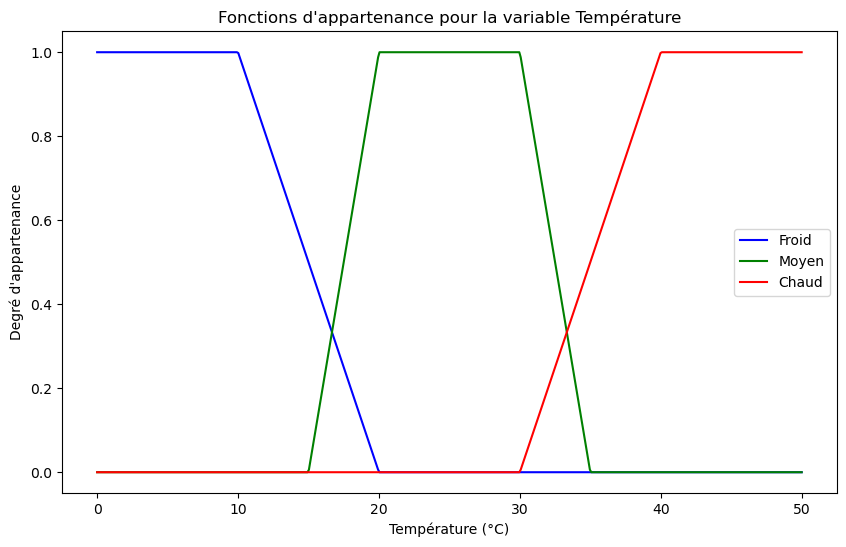

In [11]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

x_temp = np.linspace(0, 50, 500)

froid = fuzz.trapmf(x_temp, [0, 0, 10, 20])
moyen = fuzz.trapmf(x_temp, [15, 20, 30, 35])
chaud = fuzz.trapmf(x_temp, [30, 40, 50, 50])

# Visualiser les fonctions d'appartenance
plt.figure(figsize=(10, 6))
plt.plot(x_temp, froid, 'b', linewidth=1.5, label='Froid')
plt.plot(x_temp, moyen, 'g', linewidth=1.5, label='Moyen')
plt.plot(x_temp, chaud, 'r', linewidth=1.5, label='Chaud')
plt.title('Fonctions d\'appartenance pour la variable Température')
plt.xlabel('Température (°C)')
plt.ylabel('Degré d\'appartenance')
plt.legend()
plt.show()


## 2ème Partie : Système flou pour le contrôle de température

In [22]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

#### 1- Créer une nouvelle variable floue Chauffage:

In [23]:
x_temp = np.linspace(0, 50, 500)
x_chauffage = np.linspace(0, 100, 500)  

froid = fuzz.trapmf(x_temp, [0, 0, 10, 20])
moyen = fuzz.trapmf(x_temp, [15, 20, 30, 35])
chaud = fuzz.trapmf(x_temp, [30, 40, 50, 50])

#### 2-Ajouter des fonctions d’appartenance à la variable Chauffage:

In [24]:
faible = fuzz.trapmf(x_chauffage, [0, 0, 30, 50])
moyenne = fuzz.trapmf(x_chauffage, [40, 50, 70, 80])
forte = fuzz.trapmf(x_chauffage, [70, 80, 100, 100])

#### 3- Implémenter un ensemble de règles floues pour réguler la puissance du chauffage: 

In [26]:
def fuzzy_inference(temp_value):
    temp_froid = fuzz.interp_membership(x_temp, froid, temp_value)
    temp_moyen = fuzz.interp_membership(x_temp, moyen, temp_value)
    temp_chaud = fuzz.interp_membership(x_temp, chaud, temp_value)

    active_rule_forte = temp_froid  
    active_rule_moyenne = temp_moyen 
    active_rule_faible = temp_chaud 

    active_forte = np.fmin(active_rule_forte, forte)  
    active_moyenne = np.fmin(active_rule_moyenne, moyenne)
    active_faible = np.fmin(active_rule_faible, faible)

    power_activation = np.fmax(active_forte, np.fmax(active_moyenne, active_faible))

    output = fuzz.defuzz(x_chauffage, power_activation, 'centroid')  # Ajout de l'argument 'mode'
    return output

input_value = {'Température': 25}
output_value = fuzzy_inference(input_value['Température'])
print(f"Puissance du chauffage : {output_value:.2f}%")


Puissance du chauffage : 60.00%


#####  -Visualisation des fonctions d'appartenance pour la puissance de chauffage :

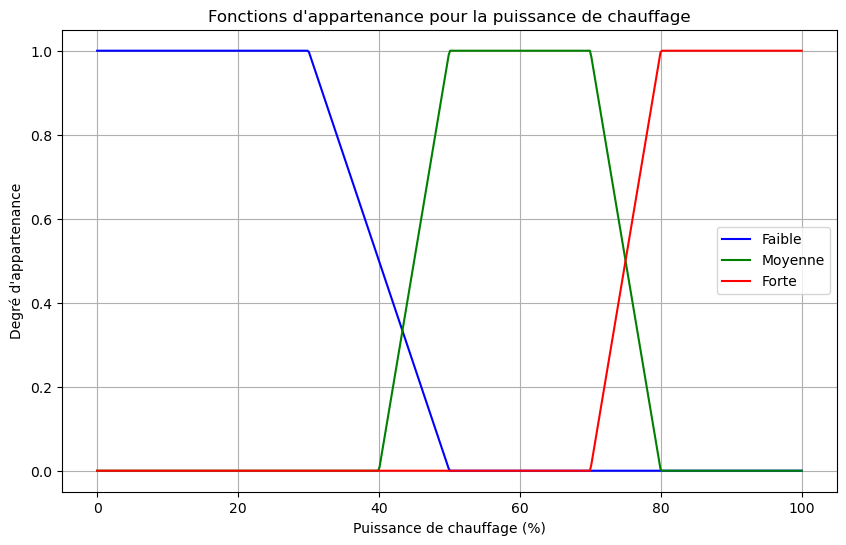

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(x_chauffage, faible, 'b', linewidth=1.5, label='Faible')
plt.plot(x_chauffage, moyenne, 'g', linewidth=1.5, label='Moyenne')
plt.plot(x_chauffage, forte, 'r', linewidth=1.5, label='Forte')
plt.title('Fonctions d\'appartenance pour la puissance de chauffage')
plt.xlabel('Puissance de chauffage (%)')
plt.ylabel('Degré d\'appartenance')
plt.legend()
plt.grid()
plt.show()

## 3ème Partie : Exploitation avancée de la bibliothèque FloLib:

### 1- Créer les Variables d'Entrée et de Sortie: 

### 2- Définir les Fonctions d'Appartenance:

In [37]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

x_distance = np.linspace(0, 100, 500) 
x_visibilite = np.linspace(0, 100, 500)  
x_vitesse = np.linspace(0, 120, 500)  

distance_courte = fuzz.trapmf(x_distance, [0, 0, 10, 20])
distance_moyenne = fuzz.trapmf(x_distance, [15, 20, 40, 50])
distance_longue = fuzz.trapmf(x_distance, [45, 60, 100, 100])

visibilite_très_faible = fuzz.trapmf(x_visibilite, [0, 0, 10, 20])
visibilite_faible = fuzz.trapmf(x_visibilite, [15, 20, 40, 50])
visibilite_bonne = fuzz.trapmf(x_visibilite, [45, 60, 100, 100])

vitesse_très_lente = fuzz.trapmf(x_vitesse, [0, 0, 20, 40])
vitesse_lente = fuzz.trapmf(x_vitesse, [30, 40, 60, 70])
vitesse_normale = fuzz.trapmf(x_vitesse, [60, 70, 90, 100])
vitesse_rapide = fuzz.trapmf(x_vitesse, [90, 100, 120, 120])

### 3- Etablir des règles floues pour contrôler la vitesse en fonction des deux entrées. 

In [38]:
def fuzzy_inference(distance_value, visibilite_value):
    distance_courte_degree = fuzz.interp_membership(x_distance, distance_courte, distance_value)
    distance_moyenne_degree = fuzz.interp_membership(x_distance, distance_moyenne, distance_value)
    distance_longue_degree = fuzz.interp_membership(x_distance, distance_longue, distance_value)

    visibilite_très_faible_degree = fuzz.interp_membership(x_visibilite, visibilite_très_faible, visibilite_value)
    visibilite_faible_degree = fuzz.interp_membership(x_visibilite, visibilite_faible, visibilite_value)
    visibilite_bonne_degree = fuzz.interp_membership(x_visibilite, visibilite_bonne, visibilite_value)

    règle_1 = np.fmin(distance_courte_degree, visibilite_très_faible_degree)
    vitesse_très_lente_activation = np.fmin(règle_1, vitesse_très_lente)

    règle_2 = np.fmin(distance_courte_degree, visibilite_faible_degree)
    vitesse_lente_activation = np.fmin(règle_2, vitesse_lente)

    vitesse_normale_activation = np.fmin(distance_moyenne_degree, vitesse_normale)

    vitesse_rapide_activation = np.fmin(distance_longue_degree, vitesse_rapide)

    vitesse_activation = np.fmax(vitesse_très_lente_activation, np.fmax(vitesse_lente_activation, np.fmax(vitesse_normale_activation, vitesse_rapide_activation)))

    vitesse_sortie = fuzz.defuzz(x_vitesse, vitesse_activation, 'centroid')
    return vitesse_sortie


### 4- Simuler Plusieurs Scénarios:

In [39]:
scenarios = [
    {'distance': 5, 'visibilite': 15},  # Court, très faible visibilité
    {'distance': 20, 'visibilite': 30},  # Court, faible visibilité
    {'distance': 30, 'visibilite': 70},  # Moyen, bonne visibilité
    {'distance': 70, 'visibilite': 50},  # Long, faible visibilité
    {'distance': 90, 'visibilite': 80}   # Long, bonne visibilité
]

for scenario in scenarios:
    vitesse_recommandee = fuzzy_inference(scenario['distance'], scenario['visibilite'])
    print(f"Pour la distance {scenario['distance']}m et visibilité {scenario['visibilite']}m, vitesse recommandée : {vitesse_recommandee:.2f} km/h")


Pour la distance 5m et visibilité 15m, vitesse recommandée : 17.94 km/h
Pour la distance 20m et visibilité 30m, vitesse recommandée : 79.89 km/h
Pour la distance 30m et visibilité 70m, vitesse recommandée : 80.00 km/h
Pour la distance 70m et visibilité 50m, vitesse recommandée : 107.33 km/h
Pour la distance 90m et visibilité 80m, vitesse recommandée : 107.33 km/h


### 5- Modifier les seuils des fonctions d’appartenance pour rendre le système plus sensible à certaines variations. 

In [42]:
distance_courte = fuzz.trapmf(x_distance, [0, 0, 8, 15])
distance_moyenne = fuzz.trapmf(x_distance, [12, 20, 35, 50])
distance_longue = fuzz.trapmf(x_distance, [40, 55, 100, 100])

visibilite_très_faible = fuzz.trapmf(x_visibilite, [0, 0, 5, 15])
visibilite_faible = fuzz.trapmf(x_visibilite, [10, 20, 30, 45])
visibilite_bonne = fuzz.trapmf(x_visibilite, [40, 60, 100, 100])

vitesse_très_lente = fuzz.trapmf(x_vitesse, [0, 0, 15, 30])
vitesse_lente = fuzz.trapmf(x_vitesse, [25, 40, 55, 70])
vitesse_normale = fuzz.trapmf(x_vitesse, [60, 80, 90, 100])
vitesse_rapide = fuzz.trapmf(x_vitesse, [100, 110, 120, 120])


In [43]:
scenarios = [
    {'distance': 5, 'visibilite': 15},  # Court, très faible visibilité
    {'distance': 20, 'visibilite': 30},  # Court, faible visibilité
    {'distance': 30, 'visibilite': 70},  # Moyen, bonne visibilité
    {'distance': 70, 'visibilite': 50},  # Long, faible visibilité
    {'distance': 90, 'visibilite': 80}   # Long, bonne visibilité
]

for scenario in scenarios:
    vitesse_recommandee = fuzzy_inference(scenario['distance'], scenario['visibilite'])
    print(f"Pour la distance {scenario['distance']} m et visibilité {scenario['visibilite']} m, vitesse recommandée : {vitesse_recommandee:.2f} km/h")

Pour la distance 5 m et visibilité 15 m, vitesse recommandée : 47.38 km/h
Pour la distance 20 m et visibilité 30 m, vitesse recommandée : 63.13 km/h
Pour la distance 30 m et visibilité 70 m, vitesse recommandée : 82.00 km/h
Pour la distance 70 m et visibilité 50 m, vitesse recommandée : 112.22 km/h
Pour la distance 90 m et visibilité 80 m, vitesse recommandée : 112.22 km/h


### 6-7 L'ajout des Règles de Prudence et des Règle de Sécurité:

In [40]:
def fuzzy_inference(distance_value, visibilite_value):
    distance_courte_degree = fuzz.interp_membership(x_distance, distance_courte, distance_value)
    distance_moyenne_degree = fuzz.interp_membership(x_distance, distance_moyenne, distance_value)
    distance_longue_degree = fuzz.interp_membership(x_distance, distance_longue, distance_value)

    visibilite_très_faible_degree = fuzz.interp_membership(x_visibilite, visibilite_très_faible, visibilite_value)
    visibilite_faible_degree = fuzz.interp_membership(x_visibilite, visibilite_faible, visibilite_value)
    visibilite_bonne_degree = fuzz.interp_membership(x_visibilite, visibilite_bonne, visibilite_value)

    règle_1 = np.fmin(distance_courte_degree, visibilite_très_faible_degree)
    vitesse_très_lente_activation = np.fmin(règle_1, vitesse_très_lente)

    règle_2 = np.fmin(distance_courte_degree, visibilite_faible_degree)
    vitesse_lente_activation = np.fmin(règle_2, vitesse_lente)

    vitesse_normale_activation = np.fmin(distance_moyenne_degree, vitesse_normale)

    vitesse_rapide_activation = np.fmin(distance_longue_degree, vitesse_rapide)

    règle_prudente = np.fmin(distance_moyenne_degree, visibilite_faible_degree)
    vitesse_prudente_activation = np.fmin(règle_prudente, vitesse_lente)

    règle_securite = visibilite_très_faible_degree  # Activé si la visibilité est très faible
    vitesse_très_lente_securite = np.fmin(règle_securite, vitesse_très_lente)

    vitesse_activation = np.fmax(vitesse_très_lente_activation, 
                        np.fmax(vitesse_lente_activation, 
                        np.fmax(vitesse_normale_activation, 
                        np.fmax(vitesse_rapide_activation, vitesse_prudente_activation))))
    
    vitesse_activation = np.fmax(vitesse_activation, vitesse_très_lente_securite)

    vitesse_sortie = fuzz.defuzz(x_vitesse, vitesse_activation, 'centroid')
    return vitesse_sortie

#### Simulation des Scénarios: 

In [41]:
scenarios = [
    {'distance': 5, 'visibilite': 15},  # Court, très faible visibilité
    {'distance': 20, 'visibilite': 30},  # Court, faible visibilité
    {'distance': 30, 'visibilite': 70},  # Moyen, bonne visibilité
    {'distance': 70, 'visibilite': 50},  # Long, faible visibilité
    {'distance': 90, 'visibilite': 80}   # Long, bonne visibilité
]

for scenario in scenarios:
    vitesse_recommandee = fuzzy_inference(scenario['distance'], scenario['visibilite'])
    print(f"Pour la distance {scenario['distance']} m et visibilité {scenario['visibilite']} m, vitesse recommandée : {vitesse_recommandee:.2f} km/h")

Pour la distance 5 m et visibilité 15 m, vitesse recommandée : 17.94 km/h
Pour la distance 20 m et visibilité 30 m, vitesse recommandée : 65.00 km/h
Pour la distance 30 m et visibilité 70 m, vitesse recommandée : 80.00 km/h
Pour la distance 70 m et visibilité 50 m, vitesse recommandée : 107.33 km/h
Pour la distance 90 m et visibilité 80 m, vitesse recommandée : 107.33 km/h
